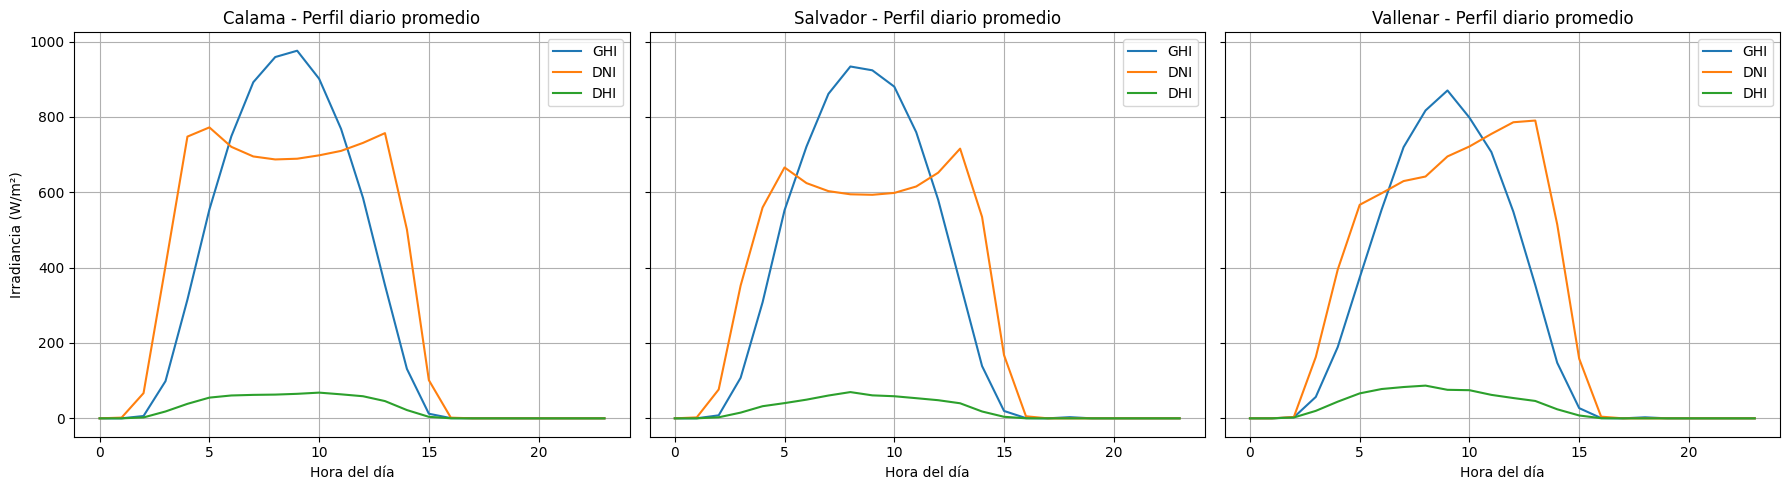

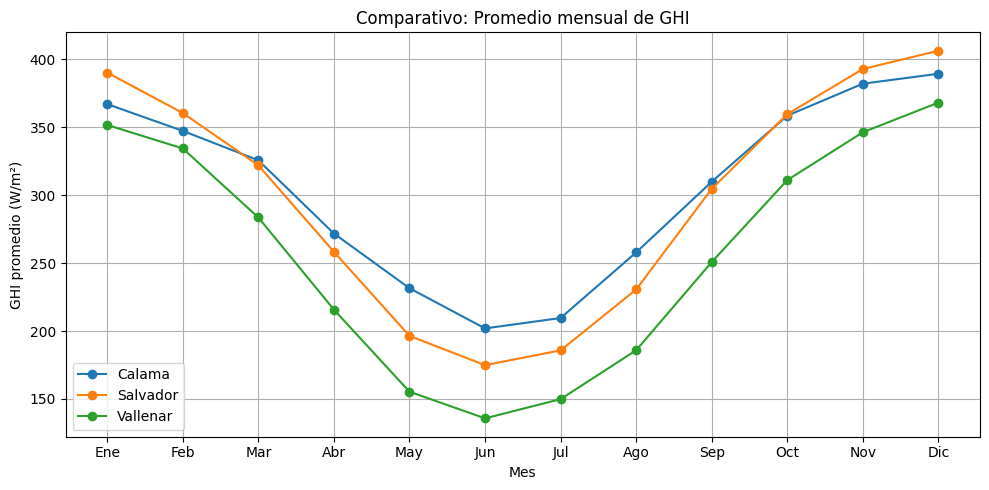

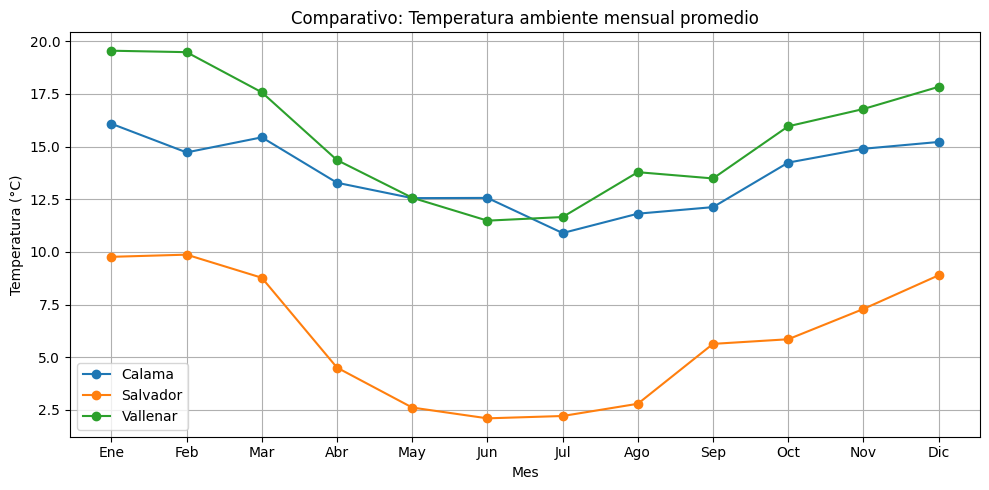

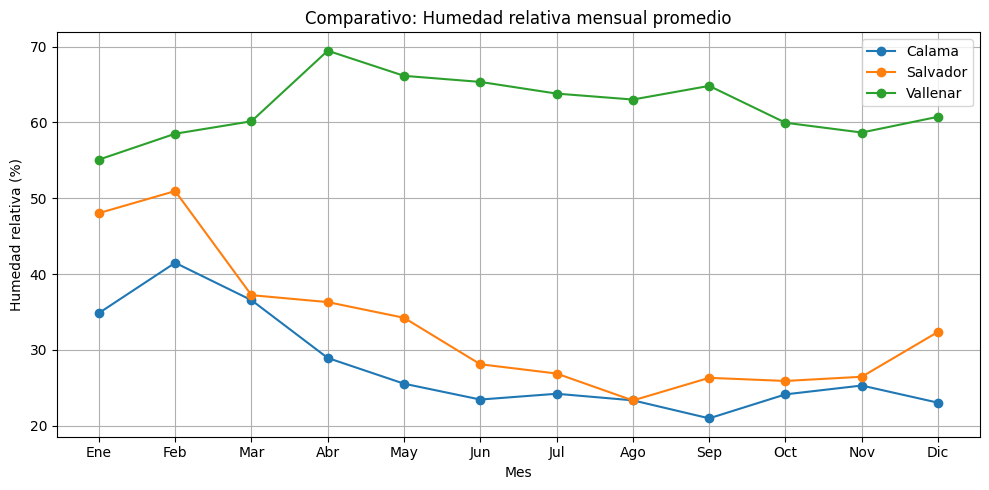


=== Calama ===


<Figure size 800x800 with 0 Axes>

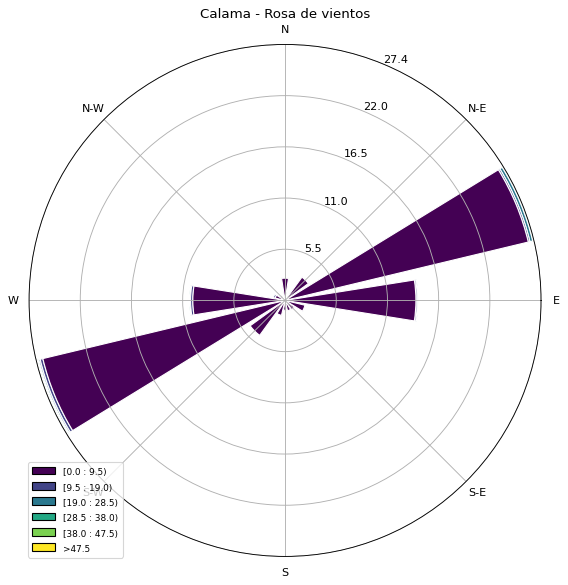

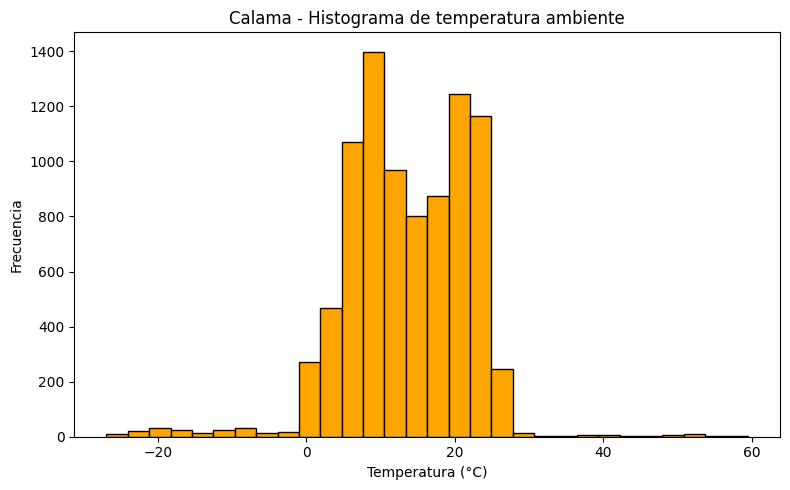

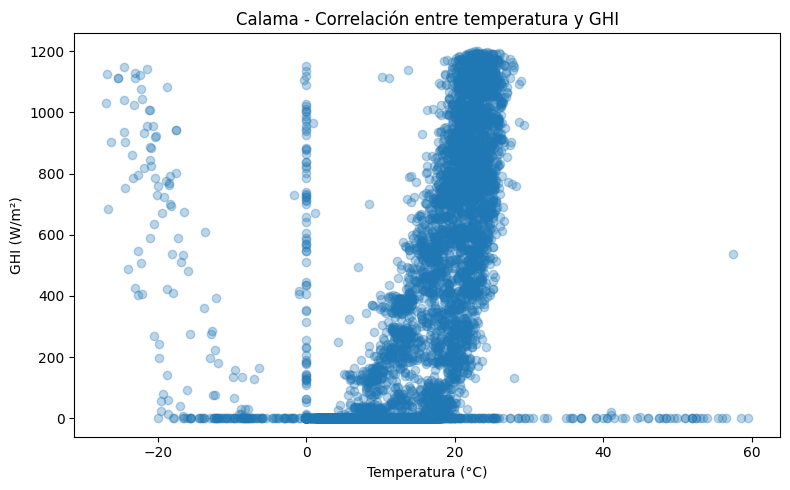

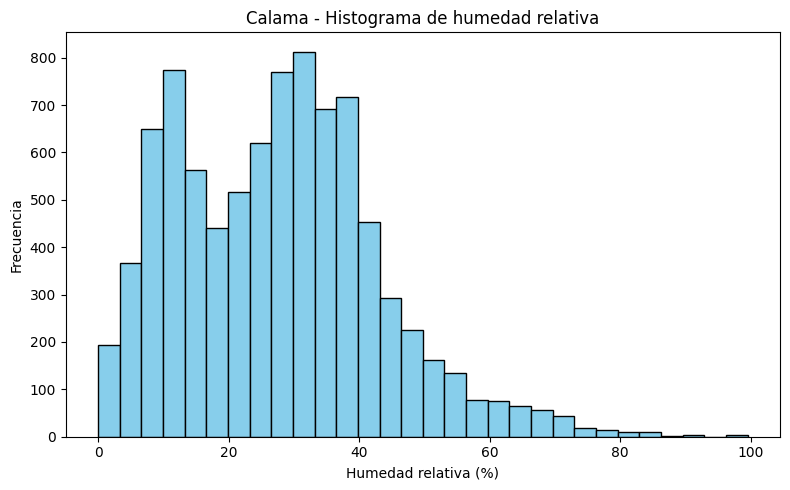


=== Salvador ===


<Figure size 800x800 with 0 Axes>

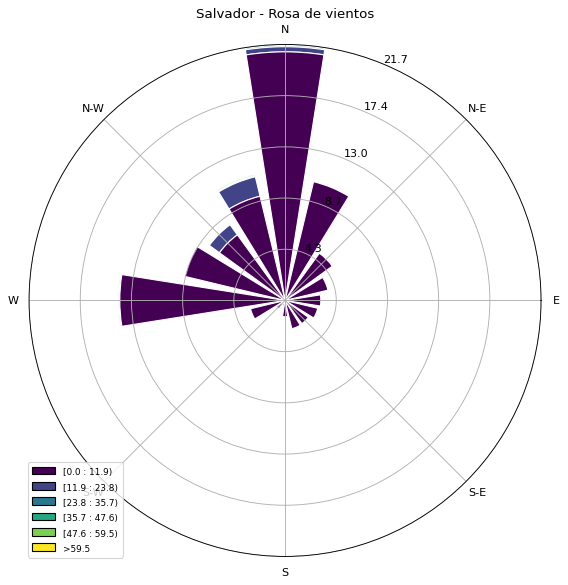

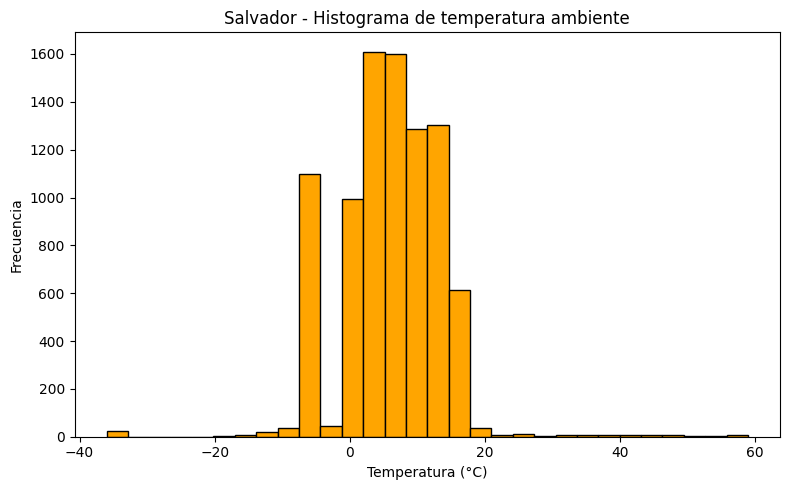

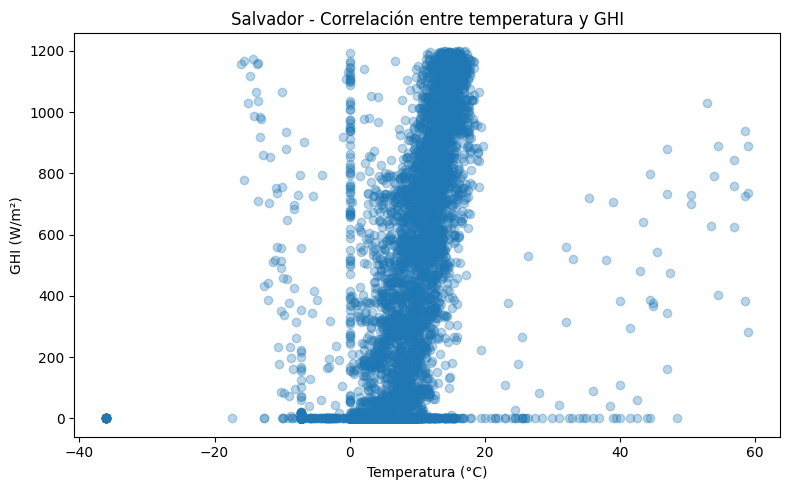

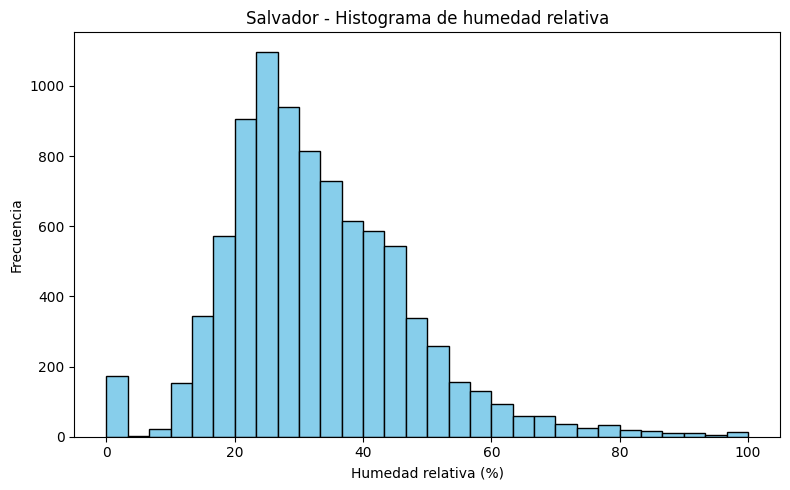


=== Vallenar ===


<Figure size 800x800 with 0 Axes>

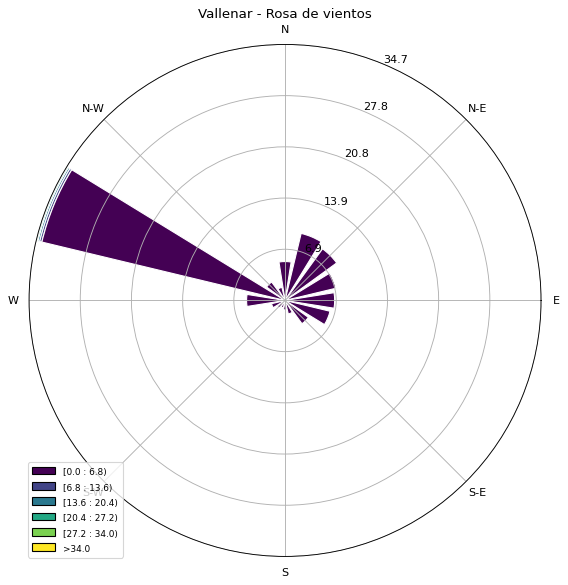

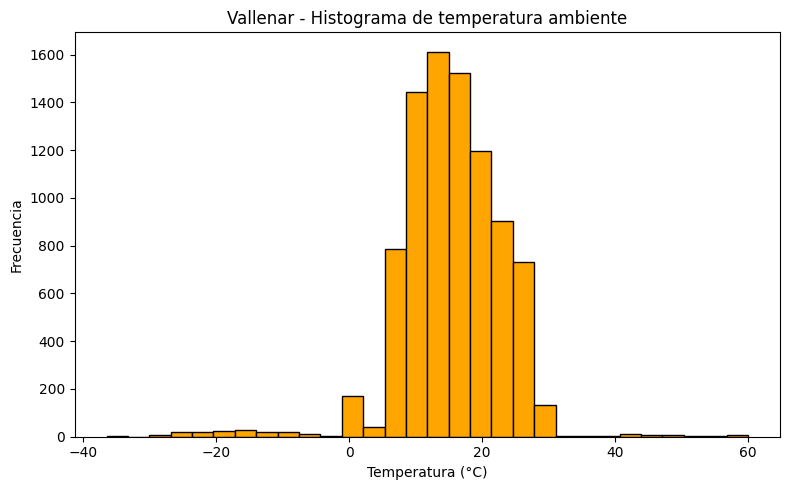

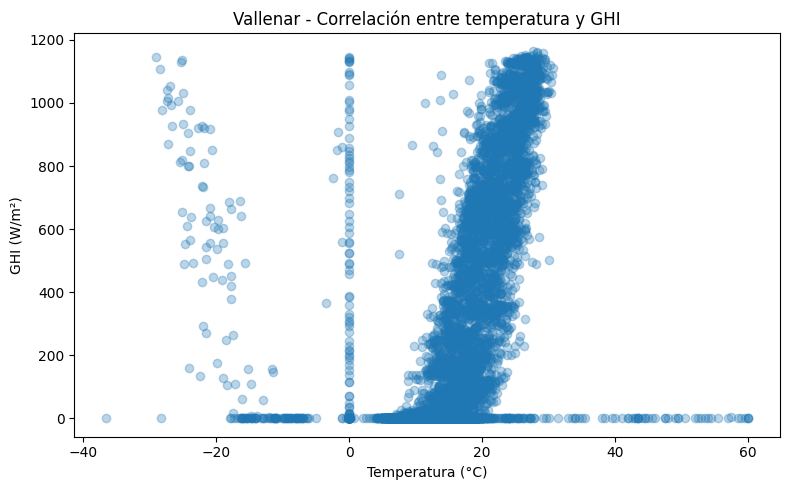

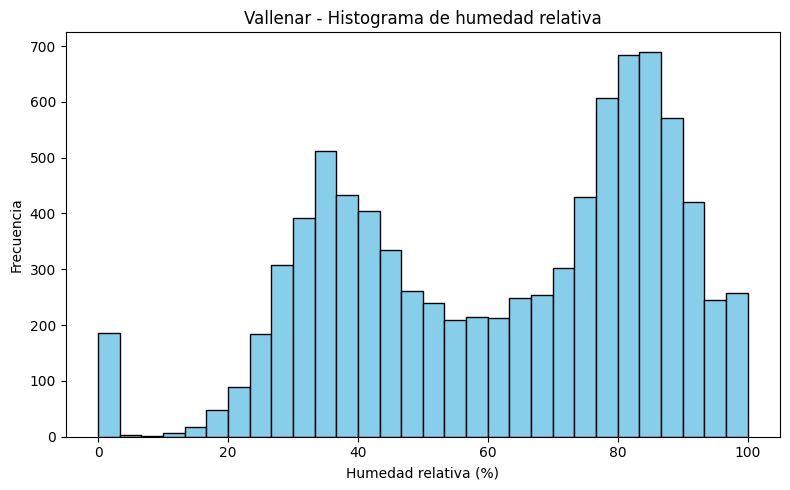

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from windrose import WindroseAxes

# === File mapping ===
files = {
    "Calama": "calama_clean.csv",
    "Salvador": "salvador_clean.csv",
    "Vallenar": "Vallenar_clean.csv"
}
utc_offset = -4  # Chile horario de invierno

# === Load all dataframes and preprocess ===
dfs = {}
for name, path in files.items():
    df = pd.read_csv(path)
    df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']], errors='coerce')
    df['datetime_local'] = df['datetime'] + pd.to_timedelta(utc_offset, unit='h')
    df.set_index('datetime_local', inplace=True)
    dfs[name] = df

# === 1. Comparative: Perfil diario promedio de irradiancia (3 subplots) ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, (name, df) in zip(axes, dfs.items()):
    for col in ['GHI', 'DNI', 'DHI']:
        ax.plot(df.groupby(df.index.hour)[col].mean(), label=col)
    ax.set_title(f"{name} - Perfil diario promedio")
    ax.set_xlabel("Hora del día")
    ax.grid(True)
    if ax is axes[0]:
        ax.set_ylabel("Irradiancia (W/m²)")
    ax.legend()
plt.tight_layout()
plt.show()

# === 2. Comparative: Promedio mensual de GHI ===
plt.figure(figsize=(10, 5))
for name, df in dfs.items():
    monthly_ghi = df.groupby('Month')['GHI'].mean()
    plt.plot(range(1, 13), monthly_ghi, marker='o', label=name)
plt.title("Comparativo: Promedio mensual de GHI")
plt.xlabel("Mes")
plt.ylabel("GHI promedio (W/m²)")
plt.xticks(ticks=np.arange(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 3. Comparative: Promedio mensual de temperatura ===
plt.figure(figsize=(10, 5))
for name, df in dfs.items():
    monthly_temp = df.groupby('Month')['Tdry'].mean()
    plt.plot(range(1, 13), monthly_temp, marker='o', label=name)
plt.title("Comparativo: Temperatura ambiente mensual promedio")
plt.xlabel("Mes")
plt.ylabel("Temperatura (°C)")
plt.xticks(ticks=np.arange(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 4. Comparative: Promedio mensual de humedad relativa ===
plt.figure(figsize=(10, 5))
for name, df in dfs.items():
    monthly_rh = df.groupby('Month')['RH'].mean()
    plt.plot(range(1, 13), monthly_rh, marker='o', label=name)
plt.title("Comparativo: Humedad relativa mensual promedio")
plt.xlabel("Mes")
plt.ylabel("Humedad relativa (%)")
plt.xticks(ticks=np.arange(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 5. Individual analysis for each location ===
for name, df in dfs.items():
    print(f"\n=== {name} ===")
    # Wind rose
    wind_dir = df['Wdir'].fillna(0)
    wind_speed = df['Wspd'].fillna(0)
    plt.figure(figsize=(8, 8))
    ax = WindroseAxes.from_ax()
    ax.bar(wind_dir, wind_speed, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title(f'{name} - Rosa de vientos')
    plt.show()

    # Histograma de temperatura ambiente
    plt.figure(figsize=(8, 5))
    plt.hist(df['Tdry'].dropna(), bins=30, color='orange', edgecolor='k')
    plt.title(f'{name} - Histograma de temperatura ambiente')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    # Correlación entre temperatura y GHI
    plt.figure(figsize=(8, 5))
    plt.scatter(df['Tdry'], df['GHI'], alpha=0.3)
    plt.title(f'{name} - Correlación entre temperatura y GHI')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('GHI (W/m²)')
    plt.tight_layout()
    plt.show()

    # Histograma de humedad relativa
    plt.figure(figsize=(8, 5))
    plt.hist(df['RH'].dropna(), bins=30, color='skyblue', edgecolor='k')
    plt.title(f'{name} - Histograma de humedad relativa')
    plt.xlabel('Humedad relativa (%)')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()